In [1]:
import numpy as np
from pydbm.nn.simpleautoencoder.contractive_auto_encoder import ContractiveAutoEncoder
from pydbm.nn.neural_network import NeuralNetwork as Encoder
from pydbm.nn.neural_network import NeuralNetwork as Decoder
from pydbm.nn.nn_layer import NNLayer as EncoderLayer
from pydbm.nn.nn_layer import NNLayer as DecoderLayer
from pydbm.activation.relu_function import ReLuFunction
from pydbm.activation.tanh_function import TanhFunction
from pydbm.activation.identity_function import IdentityFunction
from pydbm.activation.logistic_function import LogisticFunction
from pydbm.loss.mean_squared_error import MeanSquaredError
from pydbm.optimization.optparams.adam import Adam
from pydbm.synapse.nn_graph import NNGraph as EncoderGraph
from pydbm.synapse.nn_graph import NNGraph as DecoderGraph
from pydbm.verification.verificate_function_approximation import VerificateFunctionApproximation
from pydbm.optimization.batch_norm import BatchNorm

from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

In [2]:
epochs = 1000
batch_size = 20
dim1 = 100
dim2 = 500
scale = 0.01

In [3]:
encoder_activation_function = LogisticFunction()
#encoder_activation_function.batch_norm = BatchNorm()
decoder_activation_function = IdentityFunction()
#decoder_activation_function.batch_norm = BatchNorm()

In [4]:
encoder_layer = EncoderLayer(
    EncoderGraph(
        activation_function=encoder_activation_function,
        hidden_neuron_count=dim1,
        output_neuron_count=dim2,
        scale=scale,
    )
)

opt_params = Adam()
#opt_params.dropout_rate = 0.0

encoder = Encoder(
    nn_layer_list=[
        encoder_layer, 
    ],
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=1e-01,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    computable_loss=MeanSquaredError(grad_clip_threshold=1e+10),
    opt_params=opt_params,
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15
)

Setup NN layers and the parameters.


In [5]:
decoder_layer = DecoderLayer(
    DecoderGraph(
        activation_function=decoder_activation_function,
        hidden_neuron_count=dim2,
        output_neuron_count=dim1,
        scale=scale,
    )
)

opt_params = Adam()
#opt_params.dropout_rate = 0.0

decoder = Decoder(
    nn_layer_list=[
        decoder_layer, 
    ],
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=1e-01,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    computable_loss=MeanSquaredError(grad_clip_threshold=1e+10),
    opt_params=opt_params,
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15
)

Setup NN layers and the parameters.


In [6]:
auto_encoder = ContractiveAutoEncoder(
    encoder=encoder,
    decoder=decoder,
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=1e-01,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    computable_loss=MeanSquaredError(grad_clip_threshold=1e+10),
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15
)

Setup NN layers and the parameters.


In [7]:
observed_arr = np.random.normal(loc=0.0, scale=1.0, size=(1000, dim1))
observed_arr = (observed_arr - observed_arr.mean()) / (observed_arr.std())

In [8]:
# Positive hyperparameter that controls the strength of the regularization.
auto_encoder.penalty_lambda = 1.0

In [9]:
auto_encoder.learn(observed_arr=observed_arr, target_arr=observed_arr)

NN starts learning.
Best params are updated.
Epoch: 1
Loss: 
Training: 1.0109637921539332 Test: 2.9988740503081046
Epoch: 2
Loss: 
Training: 4.8112667216549765 Test: 1.6078176565910307
Epoch: 3
Loss: 
Training: 2.2875213321193444 Test: 2.727648948782597
Epoch: 4
Loss: 
Training: 3.926163679265387 Test: 3.1552533100205555
Epoch: 5
Loss: 
Training: 3.717500885842884 Test: 2.440209328633132
Epoch: 6
Loss: 
Training: 4.175081186522586 Test: 2.3039100425678987
Epoch: 7
Loss: 
Training: 4.256334290505235 Test: 1.602721989016256
Epoch: 8
Loss: 
Training: 2.2895441933656975 Test: 2.2033187316992917
Epoch: 9
Loss: 
Training: 3.8474977824596133 Test: 2.08558579231004
Epoch: 10
Loss: 
Training: 2.765938322777338 Test: 1.8249645490259994
Epoch: 11
Loss: 
Training: 3.3369826813695393 Test: 1.7583570357291538
Rolling mean of Loss (Window is 10): 
Training: 3.3087812186666996 Test: 2.2950304398954904
Epoch: 12
Loss: 
Training: 2.3017921391392226 Test: 2.177493446197474
Rolling mean of Loss (Window is

Rolling mean of Loss (Window is 10): 
Training: 2.536376163112421 Test: 1.3253321680035648
Epoch: 58
Loss: 
Training: 1.8316827798743927 Test: 1.215012860126588
Rolling mean of Loss (Window is 10): 
Training: 2.5109745449634753 Test: 1.3176731891753413
Epoch: 59
Loss: 
Training: 2.1440900138069083 Test: 1.2516446795284324
Rolling mean of Loss (Window is 10): 
Training: 2.387692358300094 Test: 1.2893137368774068
Epoch: 60
Loss: 
Training: 2.4820760765050065 Test: 1.2866037670093837
Rolling mean of Loss (Window is 10): 
Training: 2.3517950021307117 Test: 1.2612604624032286
Epoch: 61
Loss: 
Training: 2.1002945552809416 Test: 1.1994002946318663
Rolling mean of Loss (Window is 10): 
Training: 2.3511465822945623 Test: 1.2484164924189232
Epoch: 62
Loss: 
Training: 2.091824189350946 Test: 1.2236930163190145
Rolling mean of Loss (Window is 10): 
Training: 2.2217249183128955 Test: 1.2105717591421046
Epoch: 63
Loss: 
Training: 2.394440962116331 Test: 1.1611455608993142
Rolling mean of Loss (Windo

Epoch: 108
Loss: 
Training: 1.8147922259325577 Test: 1.1712400805784113
Rolling mean of Loss (Window is 10): 
Training: 1.8916679641913952 Test: 1.1361247289166723
Epoch: 109
Loss: 
Training: 1.7541763778877244 Test: 1.1680133149185568
Rolling mean of Loss (Window is 10): 
Training: 1.8941833297140256 Test: 1.1429406469126526
Epoch: 110
Loss: 
Training: 1.6835905795468287 Test: 1.074901265967227
Rolling mean of Loss (Window is 10): 
Training: 1.859995514911665 Test: 1.1466277132800635
Epoch: 111
Loss: 
Training: 1.73350397756325 Test: 1.0478176072744654
Rolling mean of Loss (Window is 10): 
Training: 1.8345071570476144 Test: 1.1350312596242285
Epoch: 112
Loss: 
Training: 2.063961493594944 Test: 1.1777072670484408
Rolling mean of Loss (Window is 10): 
Training: 1.8167492005727783 Test: 1.1285898521276732
Epoch: 113
Loss: 
Training: 1.84107275776106 Test: 1.1839979461539927
Rolling mean of Loss (Window is 10): 
Training: 1.8374690156832798 Test: 1.1368403216880014
Epoch: 114
Loss: 
Train

Rolling mean of Loss (Window is 10): 
Training: 1.8596981234275856 Test: 1.0891135302776713
Epoch: 159
Loss: 
Training: 1.8188581676406939 Test: 1.0250638390228528
Rolling mean of Loss (Window is 10): 
Training: 1.8511175160731959 Test: 1.0884014614422963
Epoch: 160
Loss: 
Training: 1.5191998281295505 Test: 1.0332622963462805
Rolling mean of Loss (Window is 10): 
Training: 1.853108894607768 Test: 1.08444984846058
Epoch: 161
Loss: 
Training: 1.7553170197431043 Test: 1.1053048762290152
Rolling mean of Loss (Window is 10): 
Training: 1.7996346728318682 Test: 1.0772095610356391
Epoch: 162
Loss: 
Training: 1.7934275719229094 Test: 1.0715907761901862
Rolling mean of Loss (Window is 10): 
Training: 1.7871982774864938 Test: 1.0766838574286146
Epoch: 163
Loss: 
Training: 1.7862795728549061 Test: 1.155845471353581
Rolling mean of Loss (Window is 10): 
Training: 1.7766035140555954 Test: 1.077309317878489
Epoch: 164
Loss: 
Training: 1.6833870607933965 Test: 1.1296240710217773
Rolling mean of Loss 

Epoch: 209
Loss: 
Training: 1.901031299795968 Test: 1.1033507395839441
Rolling mean of Loss (Window is 10): 
Training: 1.772650493314839 Test: 1.0910723854238604
Epoch: 210
Loss: 
Training: 1.8236190555799547 Test: 1.1052749915302302
Rolling mean of Loss (Window is 10): 
Training: 1.7820553085253252 Test: 1.0938800612823467
Epoch: 211
Loss: 
Training: 1.741453703063936 Test: 1.030108819286197
Rolling mean of Loss (Window is 10): 
Training: 1.7857280046127726 Test: 1.1042924019358178
Epoch: 212
Loss: 
Training: 1.9250920391587885 Test: 1.1205816251725351
Rolling mean of Loss (Window is 10): 
Training: 1.787566373032443 Test: 1.094476087501549
Epoch: 213
Loss: 
Training: 1.759332222681889 Test: 1.050444877819446
Rolling mean of Loss (Window is 10): 
Training: 1.813881296561948 Test: 1.1015194697045776
Epoch: 214
Loss: 
Training: 1.690472481988618 Test: 1.033935603071346
Rolling mean of Loss (Window is 10): 
Training: 1.7970931317742334 Test: 1.0979225455353512
Epoch: 215
Loss: 
Training:

Rolling mean of Loss (Window is 10): 
Training: 1.799068842040522 Test: 1.0986178006630762
Epoch: 260
Loss: 
Training: 1.6723813421910663 Test: 1.0785861530645593
Rolling mean of Loss (Window is 10): 
Training: 1.8119884624573757 Test: 1.098461395877911
Epoch: 261
Loss: 
Training: 1.8606576574873788 Test: 1.0244952736875357
Rolling mean of Loss (Window is 10): 
Training: 1.783824676614228 Test: 1.0949119971962602
Epoch: 262
Loss: 
Training: 1.9606966711125755 Test: 1.0377485976732719
Rolling mean of Loss (Window is 10): 
Training: 1.8037776569630186 Test: 1.0880223797595676
Epoch: 263
Loss: 
Training: 1.6444110589712377 Test: 1.1093672568881099
Rolling mean of Loss (Window is 10): 
Training: 1.812205419374889 Test: 1.0792830169485004
Epoch: 264
Loss: 
Training: 1.7535182578696904 Test: 1.0283427576562263
Rolling mean of Loss (Window is 10): 
Training: 1.7900165494009794 Test: 1.0774177033034462
Epoch: 265
Loss: 
Training: 1.7564373280274734 Test: 1.0739428843365222
Rolling mean of Loss

Epoch: 310
Loss: 
Training: 2.00958642820937 Test: 1.101825194248539
Rolling mean of Loss (Window is 10): 
Training: 1.753873317783788 Test: 1.0899960206893735
Epoch: 311
Loss: 
Training: 1.8210013065146986 Test: 1.1002116378721125
Rolling mean of Loss (Window is 10): 
Training: 1.7770147213680203 Test: 1.0847143427552746
Epoch: 312
Loss: 
Training: 2.031250174924403 Test: 1.084830046961591
Rolling mean of Loss (Window is 10): 
Training: 1.7979649362755965 Test: 1.0877746785920759
Epoch: 313
Loss: 
Training: 1.66468985601773 Test: 1.1067802292233155
Rolling mean of Loss (Window is 10): 
Training: 1.8265181556399266 Test: 1.0849919930700604
Epoch: 314
Loss: 
Training: 1.705114288839175 Test: 1.028031733115436
Rolling mean of Loss (Window is 10): 
Training: 1.7942707982927721 Test: 1.0855056007878026
Epoch: 315
Loss: 
Training: 1.950741538463761 Test: 1.088533588494833
Rolling mean of Loss (Window is 10): 
Training: 1.7909593293347517 Test: 1.0774009055399287
Epoch: 316
Loss: 
Training: 

Rolling mean of Loss (Window is 10): 
Training: 1.8057843975066266 Test: 1.1020174168863819
Epoch: 361
Loss: 
Training: 1.6004549221358377 Test: 1.0882883207421832
Rolling mean of Loss (Window is 10): 
Training: 1.8036619358754422 Test: 1.0984235698138718
Epoch: 362
Loss: 
Training: 2.060141322697203 Test: 1.107006684580343
Rolling mean of Loss (Window is 10): 
Training: 1.7774408082000275 Test: 1.1025871459545638
Epoch: 363
Loss: 
Training: 1.8279668075304643 Test: 1.1349927951580985
Rolling mean of Loss (Window is 10): 
Training: 1.804014553590995 Test: 1.0998163281156037
Epoch: 364
Loss: 
Training: 1.970620988147369 Test: 1.088162926582116
Rolling mean of Loss (Window is 10): 
Training: 1.8101155358991456 Test: 1.0978204258744424
Epoch: 365
Loss: 
Training: 1.912100869771965 Test: 1.1492329451163452
Rolling mean of Loss (Window is 10): 
Training: 1.8416208729531447 Test: 1.0923503003103157
Epoch: 366
Loss: 
Training: 1.7782108662400216 Test: 1.0429537678775207
Rolling mean of Loss (

Epoch: 411
Loss: 
Training: 1.557186096853089 Test: 1.0853882501419334
Rolling mean of Loss (Window is 10): 
Training: 1.8687734213023801 Test: 1.0888146895075403
Epoch: 412
Loss: 
Training: 1.6496093795823699 Test: 1.1110439089096065
Rolling mean of Loss (Window is 10): 
Training: 1.863366875970759 Test: 1.087680008309198
Epoch: 413
Loss: 
Training: 1.9641183271496516 Test: 1.1590321837223982
Rolling mean of Loss (Window is 10): 
Training: 1.8269313415998973 Test: 1.092531543158549
Epoch: 414
Loss: 
Training: 1.6772167523725996 Test: 1.014268190135233
Rolling mean of Loss (Window is 10): 
Training: 1.8517042230966627 Test: 1.0926537597397323
Epoch: 415
Loss: 
Training: 1.5854274459859925 Test: 1.0886555724472486
Rolling mean of Loss (Window is 10): 
Training: 1.8293504889655328 Test: 1.0840444427524547
Epoch: 416
Loss: 
Training: 1.7732671734894923 Test: 1.0383803776487357
Rolling mean of Loss (Window is 10): 
Training: 1.8108082340673044 Test: 1.085674480355204
Epoch: 417
Loss: 
Trai

Rolling mean of Loss (Window is 10): 
Training: 1.7713478271296939 Test: 1.0761366949961795
Epoch: 462
Loss: 
Training: 1.6817032022946048 Test: 1.0702924452100118
Rolling mean of Loss (Window is 10): 
Training: 1.7928607717015468 Test: 1.083278069182966
Epoch: 463
Loss: 
Training: 1.99761290593598 Test: 1.120131044611122
Rolling mean of Loss (Window is 10): 
Training: 1.7892903848821846 Test: 1.0863197510590066
Epoch: 464
Loss: 
Training: 1.5937448675772672 Test: 1.0947179905849571
Rolling mean of Loss (Window is 10): 
Training: 1.8213248418435284 Test: 1.0948495616572425
Epoch: 465
Loss: 
Training: 1.855841502980421 Test: 0.962099800079047
Rolling mean of Loss (Window is 10): 
Training: 1.8006302027770122 Test: 1.0878043109121902
Epoch: 466
Loss: 
Training: 1.8140876587132198 Test: 1.1124280340873605
Rolling mean of Loss (Window is 10): 
Training: 1.8133796752326732 Test: 1.079798134114514
Epoch: 467
Loss: 
Training: 1.8009491050931445 Test: 1.0261567334745065
Rolling mean of Loss (W

Epoch: 512
Loss: 
Training: 1.704014891390913 Test: 1.1374540331842673
Rolling mean of Loss (Window is 10): 
Training: 1.7885213876659196 Test: 1.0873161730877359
Epoch: 513
Loss: 
Training: 1.7282292278838163 Test: 1.0959404741326686
Rolling mean of Loss (Window is 10): 
Training: 1.7805182772641035 Test: 1.092799375356213
Epoch: 514
Loss: 
Training: 1.9104428490615493 Test: 1.1233353649633953
Rolling mean of Loss (Window is 10): 
Training: 1.7758338079595195 Test: 1.0933223670663708
Epoch: 515
Loss: 
Training: 1.8921670708004996 Test: 1.0550447251276196
Rolling mean of Loss (Window is 10): 
Training: 1.7903321253887359 Test: 1.0995962595434523
Epoch: 516
Loss: 
Training: 1.750505707054911 Test: 1.0648971065955655
Rolling mean of Loss (Window is 10): 
Training: 1.8098164812512352 Test: 1.0931251087867366
Epoch: 517
Loss: 
Training: 1.7011456122193624 Test: 1.10263116248417
Rolling mean of Loss (Window is 10): 
Training: 1.7973489796305735 Test: 1.088631676220075
Epoch: 518
Loss: 
Trai

Rolling mean of Loss (Window is 10): 
Training: 1.7891707946983408 Test: 1.1043434163386465
Epoch: 563
Loss: 
Training: 1.656537782122269 Test: 1.1190841300774228
Rolling mean of Loss (Window is 10): 
Training: 1.7759962781080798 Test: 1.1033134152012078
Epoch: 564
Loss: 
Training: 1.9387782668143192 Test: 1.08468119338384
Rolling mean of Loss (Window is 10): 
Training: 1.7762084418123294 Test: 1.101751716849853
Epoch: 565
Loss: 
Training: 1.6630746182776825 Test: 1.0645767691920711
Rolling mean of Loss (Window is 10): 
Training: 1.7975700696014116 Test: 1.094655640801568
Epoch: 566
Loss: 
Training: 1.80263301089568 Test: 1.0882901900499677
Rolling mean of Loss (Window is 10): 
Training: 1.7940993537760392 Test: 1.0891061574521241
Epoch: 567
Loss: 
Training: 1.932933760242922 Test: 1.1398665894424287
Rolling mean of Loss (Window is 10): 
Training: 1.803270870145304 Test: 1.0921646242691492
Epoch: 568
Loss: 
Training: 1.782995180316733 Test: 1.1629895467200844
Rolling mean of Loss (Wind

Epoch: 613
Loss: 
Training: 1.7851326003221932 Test: 1.0580317156733974
Rolling mean of Loss (Window is 10): 
Training: 1.8529698603235787 Test: 1.1062516252306305
Epoch: 614
Loss: 
Training: 1.9292864382971335 Test: 1.1249609799818654
Rolling mean of Loss (Window is 10): 
Training: 1.8719991856627352 Test: 1.0945466532202834
Epoch: 615
Loss: 
Training: 1.7389983238168643 Test: 1.1384637316887405
Rolling mean of Loss (Window is 10): 
Training: 1.892793128743604 Test: 1.095858232098251
Epoch: 616
Loss: 
Training: 1.859300640317495 Test: 1.0434842023430464
Rolling mean of Loss (Window is 10): 
Training: 1.8952796117265218 Test: 1.0968038892190812
Epoch: 617
Loss: 
Training: 1.8034713629897288 Test: 1.0759851434636223
Rolling mean of Loss (Window is 10): 
Training: 1.8823412396705526 Test: 1.0912525279049297
Epoch: 618
Loss: 
Training: 1.6388247649935006 Test: 1.0598354425987464
Rolling mean of Loss (Window is 10): 
Training: 1.8664186686174316 Test: 1.097436223472936
Epoch: 619
Loss: 
Tr

Rolling mean of Loss (Window is 10): 
Training: 1.7926362359846961 Test: 1.0831235190995712
Epoch: 664
Loss: 
Training: 1.724449210663679 Test: 0.9991512125106149
Rolling mean of Loss (Window is 10): 
Training: 1.7763338414085237 Test: 1.0803241665370211
Epoch: 665
Loss: 
Training: 1.89702551620251 Test: 1.0358613201854618
Rolling mean of Loss (Window is 10): 
Training: 1.7489856235743595 Test: 1.0701410976005934
Epoch: 666
Loss: 
Training: 1.737238782847009 Test: 1.0848612917374503
Rolling mean of Loss (Window is 10): 
Training: 1.7481139295303343 Test: 1.068083621783804
Epoch: 667
Loss: 
Training: 1.9219193021513963 Test: 1.0693703323395596
Rolling mean of Loss (Window is 10): 
Training: 1.7668900138335135 Test: 1.0706533021984654
Epoch: 668
Loss: 
Training: 1.9658404229143198 Test: 1.1605215573100882
Rolling mean of Loss (Window is 10): 
Training: 1.802498693282717 Test: 1.0653472427811166
Epoch: 669
Loss: 
Training: 1.6645210541010191 Test: 1.1981871990806112
Rolling mean of Loss (

Epoch: 714
Loss: 
Training: 1.7639915441494296 Test: 1.1541566791794815
Rolling mean of Loss (Window is 10): 
Training: 1.7613107044505658 Test: 1.0894155897305473
Epoch: 715
Loss: 
Training: 1.6629790906110222 Test: 1.0414639395662975
Rolling mean of Loss (Window is 10): 
Training: 1.7425558229660503 Test: 1.0936414067163747
Epoch: 716
Loss: 
Training: 1.8646702551647911 Test: 1.0689341251571454
Rolling mean of Loss (Window is 10): 
Training: 1.7230936275081337 Test: 1.0881541280052613
Epoch: 717
Loss: 
Training: 1.8385906646928978 Test: 1.106928865152841
Rolling mean of Loss (Window is 10): 
Training: 1.7358282844249497 Test: 1.0805054099343683
Epoch: 718
Loss: 
Training: 1.918826367669353 Test: 1.090108681839728
Rolling mean of Loss (Window is 10): 
Training: 1.7303122228585603 Test: 1.0883446429160435
Epoch: 719
Loss: 
Training: 1.698660260245268 Test: 1.09425883400328
Rolling mean of Loss (Window is 10): 
Training: 1.7546121531744858 Test: 1.0881830625756583
Epoch: 720
Loss: 
Trai

Rolling mean of Loss (Window is 10): 
Training: 1.7938775907176416 Test: 1.1207362731655857
Epoch: 765
Loss: 
Training: 1.998422123834212 Test: 1.0509178612160308
Rolling mean of Loss (Window is 10): 
Training: 1.801476112467381 Test: 1.1135728050840186
Epoch: 766
Loss: 
Training: 1.8510269229809482 Test: 1.0747196846488687
Rolling mean of Loss (Window is 10): 
Training: 1.8280404919929005 Test: 1.1095104236041622
Epoch: 767
Loss: 
Training: 1.7212691723441422 Test: 1.065572497151006
Rolling mean of Loss (Window is 10): 
Training: 1.836312255976313 Test: 1.0968337310994096
Epoch: 768
Loss: 
Training: 1.7005832952467705 Test: 1.041599987997565
Rolling mean of Loss (Window is 10): 
Training: 1.8304600635080661 Test: 1.090387710035784
Epoch: 769
Loss: 
Training: 1.6651210354921873 Test: 1.001938288606843
Rolling mean of Loss (Window is 10): 
Training: 1.8084255562636915 Test: 1.0914179142868867
Epoch: 770
Loss: 
Training: 1.7106403346363845 Test: 1.071159436008893
Rolling mean of Loss (Wi

Epoch: 815
Loss: 
Training: 1.5761710702384573 Test: 1.127057930486855
Rolling mean of Loss (Window is 10): 
Training: 1.7846802744671304 Test: 1.0935335899305625
Epoch: 816
Loss: 
Training: 1.7602243407856364 Test: 1.1251468830363074
Rolling mean of Loss (Window is 10): 
Training: 1.7515589378800225 Test: 1.103466679663223
Epoch: 817
Loss: 
Training: 1.9011899701215962 Test: 1.070567274132658
Rolling mean of Loss (Window is 10): 
Training: 1.7363861184554525 Test: 1.1082440873746027
Epoch: 818
Loss: 
Training: 1.8358201178241416 Test: 1.031666219810358
Rolling mean of Loss (Window is 10): 
Training: 1.7590690725552034 Test: 1.11233202568739
Epoch: 819
Loss: 
Training: 1.586397350145086 Test: 0.9872600309032762
Rolling mean of Loss (Window is 10): 
Training: 1.762847043787025 Test: 1.0989029365447878
Epoch: 820
Loss: 
Training: 2.0051008056936084 Test: 1.0541225829977403
Rolling mean of Loss (Window is 10): 
Training: 1.7455922504849597 Test: 1.084333724401192
Epoch: 821
Loss: 
Trainin

Rolling mean of Loss (Window is 10): 
Training: 1.7661542845166842 Test: 1.0899065581395249
Epoch: 866
Loss: 
Training: 1.7595440374373659 Test: 1.0404320674318293
Rolling mean of Loss (Window is 10): 
Training: 1.762721345044201 Test: 1.094767565610976
Epoch: 867
Loss: 
Training: 1.7274653685063819 Test: 1.0522356452170676
Rolling mean of Loss (Window is 10): 
Training: 1.7791290658723216 Test: 1.0874632208991055
Epoch: 868
Loss: 
Training: 1.8899015275431774 Test: 1.06184860829198
Rolling mean of Loss (Window is 10): 
Training: 1.7593837930957896 Test: 1.081910274937966
Epoch: 869
Loss: 
Training: 1.7651332492077692 Test: 1.0577398139407688
Rolling mean of Loss (Window is 10): 
Training: 1.7665520422728214 Test: 1.0773313875148205
Epoch: 870
Loss: 
Training: 1.8785058612400958 Test: 1.1617428135021337
Rolling mean of Loss (Window is 10): 
Training: 1.7732032676488458 Test: 1.0734813381590602
Epoch: 871
Loss: 
Training: 1.767185163244882 Test: 1.1321317844721734
Rolling mean of Loss (

Training: 1.8153145213117727 Test: 1.079482556233784
Epoch: 916
Loss: 
Training: 1.5489484802901257 Test: 1.0460316289588514
Rolling mean of Loss (Window is 10): 
Training: 1.8119415795457112 Test: 1.0865274662420723
Epoch: 917
Loss: 
Training: 1.8105741851016974 Test: 1.0429456039133742
Rolling mean of Loss (Window is 10): 
Training: 1.7996694734800731 Test: 1.08099187147304
Epoch: 918
Loss: 
Training: 1.919502550511254 Test: 1.1024770094851355
Rolling mean of Loss (Window is 10): 
Training: 1.7839652118987899 Test: 1.0749224116845368
Epoch: 919
Loss: 
Training: 1.8846674254590183 Test: 1.1354743677878696
Rolling mean of Loss (Window is 10): 
Training: 1.8011378031971155 Test: 1.0732656828405507
Epoch: 920
Loss: 
Training: 1.7869291329187318 Test: 1.1003842235268346
Rolling mean of Loss (Window is 10): 
Training: 1.809554032619656 Test: 1.081893678397035
Epoch: 921
Loss: 
Training: 1.5883653098653643 Test: 1.1089191055429373
Rolling mean of Loss (Window is 10): 
Training: 1.8005798722

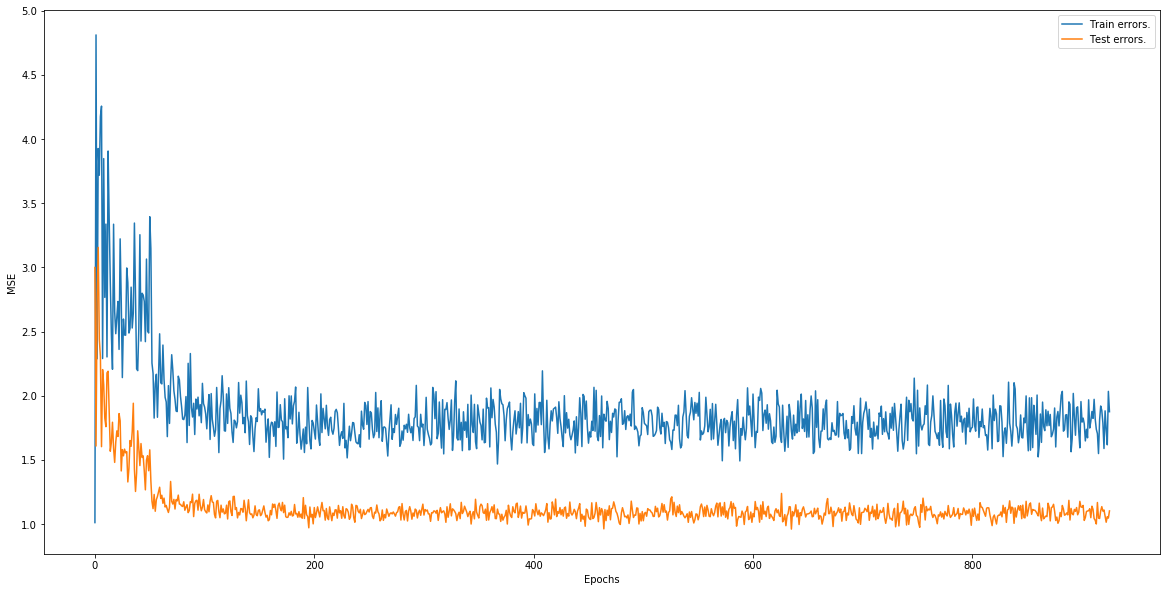

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
_ = plt.figure(figsize=(20, 10))
plt.plot(auto_encoder.verificatable_result.logs_df.train_loss.values, label="Train errors.")
plt.plot(auto_encoder.verificatable_result.logs_df.test_loss.values, label="Test errors.")
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.show()
plt.close()